# Viz passages

In [13]:
# !pip install /home/ryan/Downloads/prodigy-1.10.6-cp36.cp37.cp38-cp36m.cp37m.cp38-linux_x86_64.whl

In [14]:
import sys; sys.path.append('../..')
from abslithist.realism import *

In [15]:
anno_fn='../../data/psgs/data.annos.CanonFiction.v4.jsonl'

In [16]:
!prodigy db-out absconc_v4b > $anno_fn

In [17]:
!wc -l $anno_fn

204 ../../data/psgs/data.annos.CanonFiction.v4.jsonl


In [52]:
def parse_anno(anno_fn):
    ld = []

    with open(anno_fn) as f:
        for ln in f:
            d=json.loads(ln)
#             print(d)
            if d['answer']=='ignore': continue
            dx={'passage':d.get('html') if 'html' in d else d.get('text'), 'tags':d['accept']}
            for k,v in d['meta'].items(): dx[k]=v
            for x in d['accept']: dx[x]=1
            dx['_input_hash']=d['_input_hash']
            dx['_task_hash']=d['_task_hash']
            ld.append(dx)
    df=pd.DataFrame(ld).fillna(0).sort_values('abs-conc')
    return df

In [53]:
def printpsg(row):
    printm(row.passage)
    printm(f'-- {row.author}, <i>{row.title}</i> ({row.year}) [abs-conc={row["abs-conc"]}; abs-conc_z={round(row["abs-conc_z"],2)}]')
    printm(f'tags: {", ".join(row.tags)}')

In [54]:
annodf=parse_anno(anno_fn)
annodf

,passage,tags,id,author,title,year,major_genre,canon_genre,slice,source,...,OBJDESC,GROTESQUE,INFLATEDSTYLE,DOMESTIC,SLOWTIME,JUDGMENT,PERSABS,EPISTEMOLOGY,COUNSEL,HONOUR
96,. <i>Entering</i> my own <i>office</i> and <i>...,"[BODYDESC, PLACEDESC, DETAILED]",Knausgaard.My Struggle.Book1,Knausgaard,My Struggle (Book 1),2009,Novel,Knausgaard,390,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,a <i>sword</i>; and all his body is <i><u>cove...,"[DETAILED, OBJDESC]",Heliodorus.Aethopian Story.Underdowne+Wright t...,Heliodorus,Aethiopian Story,300,Novel,Heliodorus,220,Median,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,", up where the <i><u>baby</u></i> <i>souls</i>...","[BODYDESC, SLOWTIME, PLACEDESC, OBJDESC, FIGURAL]",chadwyck.Ward.The_Silent_Partner.0856,"Ward, Elizabeth Stuart Phelps, 1844-1911",The Silent Partner. (1871),1871,,,155,Median,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,", <i><u>rouge</u></i>, and <i><u>lipstick</u><...","[BODYDESC, PLACEDESC, ACTION]",Franzen.Corrections,Jonathan Franzen,The Corrections,2001,Novel,Franzen,486,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,", <i>Pa</i> might not say much when Pedersen c...","[MOVEMENT, PLACEDESC]",markmark.Gass.In_the_Heart_of_the_Count.1456,"Gass, William H.",In the Heart of the Country,1968,,,11,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,had he against a man Like that? <i>Buckley</i>...,"[ABSGEN, SOCIALANALYSIS]",markmark.Wright.Native_Son.1681,"Wright, Richard Nathaniel",Native Son,1940,,,438,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,the father. But as this <i>Gentleman</i> think...,"[DIALOGUE, MORALITY, PROPRIETY]",chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,"Sidney, Philip, Sir, 1554-1586",The Covntesse of Pembrokes Arcadia (1593),1593,Pastoral,Sidney,842,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,. It is <i>n't</i> <i><b>natural</b></i> <i>ap...,"[ABSGEN, MORALITY, SOCIALANALYSIS]",markmark.Huxley.Post_Counter_Point.1511,"Huxley, Aldous Leonard",Post Counter Point,1928,,,527,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,", and <i>killing</i> him with <i><b>deceitful<...",[SOCIALANALYSIS],chadwyck.Herbert.The_Princess_Cloria.0978,"Herbert, Percy, Sir",The Princess Cloria (1661),1661,Romance,Political rom.,434,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
annodf.tail(10)

,passage,tags,id,author,title,year,major_genre,canon_genre,slice,source,...,OBJDESC,GROTESQUE,INFLATEDSTYLE,DOMESTIC,SLOWTIME,JUDGMENT,PERSABS,EPISTEMOLOGY,COUNSEL,HONOUR
62,", and <i>possesses</i> them too much to be <i>...",[SOCIALANALYSIS],More.Utopia,Thomas More,Utopia,1516,Other,“Utopia”,108,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,", but it was of course as much about the <i>op...",[SOCIALANALYSIS],Lerner.The Topeka School,Lerner,Topeka School,2019,Novel,Lerner,149,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,"of her <i>art</i>, made this <i><u>piece</u></...","[DIALOGUE, INFLATEDSTYLE]",Montalvo.Amadis of Gaul.Book 1,Montalvo,Amadis of Gaul,1508,Romance,“Amadis of Gaul”,144,Median,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,"<i><b>correct</b></i>. In any case, you alone ...",[SOCIALANALYSIS],markmark.Larsson.The_Girl_Who_Kicked_the_H.1546,"Larsson, Stieg",The Girl Who Kicked the Hornet's Nest,2007,,,305,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,. But I'm <i>extremely</i> <i>worried</i> abou...,[SOCIALANALYSIS],markmark.Larsson.The_Girl_Who_Kicked_the_H.1546,"Larsson, Stieg",The Girl Who Kicked the Hornet's Nest,2007,,,184,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,had he against a man Like that? <i>Buckley</i>...,"[ABSGEN, SOCIALANALYSIS]",markmark.Wright.Native_Son.1681,"Wright, Richard Nathaniel",Native Son,1940,,,438,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,the father. But as this <i>Gentleman</i> think...,"[DIALOGUE, MORALITY, PROPRIETY]",chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,"Sidney, Philip, Sir, 1554-1586",The Covntesse of Pembrokes Arcadia (1593),1593,Pastoral,Sidney,842,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,. It is <i>n't</i> <i><b>natural</b></i> <i>ap...,"[ABSGEN, MORALITY, SOCIALANALYSIS]",markmark.Huxley.Post_Counter_Point.1511,"Huxley, Aldous Leonard",Post Counter Point,1928,,,527,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,", and <i>killing</i> him with <i><b>deceitful<...",[SOCIALANALYSIS],chadwyck.Herbert.The_Princess_Cloria.0978,"Herbert, Percy, Sir",The Princess Cloria (1661),1661,Romance,Political rom.,434,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,. On this <i><b>law</b></i> <i><b>democracy</b...,[SOCIALANALYSIS],markmark.Larsson.The_Girl_Who_Kicked_the_H.1546,"Larsson, Stieg",The Girl Who Kicked the Hornet's Nest,2007,,,233,Median,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
annodf[annodf.year<1700][['passage','tags','id','year','abs-conc','abs-conc_z']]

,passage,tags,id,year,abs-conc,abs-conc_z
90,a <i>sword</i>; and all his body is <i><u>cove...,"[DETAILED, OBJDESC]",Heliodorus.Aethopian Story.Underdowne+Wright t...,300,-48,-2.614354
168,<i><u>black</u></i> <i><u>wool</u></i>. I <i><...,"[ACTION, OBJDESC, PLACEDESC, DETAILED, GROTESQUE]",Homer.Odyssey.Johnston,-800,-38,-2.106944
31,of the <i><u>heifer</u></i>.[7] Then the <i>pr...,"[CATALOGUE, DETAILED]",Bible.Numbers.KJV,-400,-37,-2.056203
76,", a <i><u>galley</u></i> was seen between the ...","[ACTION, PLACEDESC, DETAILED]",Montalvo.Amadis of Gaul Vol 2,1508,-33,-1.853239
95,the whole <i><u>ram</u></i> upon the <i>altar<...,"[CATALOGUE, FIGURAL]",Unknown.King James Bible.Old Testament,1611,-33,-1.853239
63,"of the <i><u>woods</u></i>,' he said,'Sent by ...","[ACTION, COMBAT, CHARDESC]",Virgil.Aeneid.Dryden,-19,-31,-1.751757
143,"and <i>prayed</i> to the gods, <i><u>plucking<...","[ACTION, GROTESQUE, OBJDESC, DETAILED]",Homer.Odyssey.Butcher,-800,-30,-1.701016
128,", there came a <i><u>Canoe</u></i> to <i>meet<...","[BODYDESC, ACTION, PLACEDESC, INTERSOCIAL, MOV...",chadwyck.W P.The_Relation_of_a_Wonderf.0988,1619,-29,-1.650275
140,", a <i>calming</i> <i>sleep</i> <i>fell</i> on...","[FIGURAL, INTERSOCIAL, MOVEMENT, PLACEDESC]",Homer.Odyssey.Johnston,-800,-25,-1.447311
172,. Here was <i><u>Carcasses</u></i> <i>business...,"[BODYDESC, CHARDESC, MOVEMENT]",Pepys.Diary,1660,-23,-1.345829


In [66]:
amadis=annodf.loc[129]
printpsg(amadis)

of her <i>art</i>, made this <i><u>piece</u></i> to <i>excel</i> all other in <i>perfection</i>. I will leave you then to consider on the <i><b>judgement</b></i> of <i>Amadis</i>, who( when the was nothing so <i>glorious</i> in <i><b>fairness</b></i>) thought her <i><b>worthy</b></i> the love of the best Knight in the world: now if he <i>stood</i> <i>mute</i>, <i><b>blame</b></i> him not, having the only <i>jewel</i> of his <i>heart</i> before him, and therefore she to <i>break</i> off this <i>silence</i>, first <i>spoke</i> in this manner. My Lord, if I have given you the <i><b>liberty</b></i>( <i><b>contrary</b></i> to my <i><b>duty</b></i> and <i>custom</i>) to see me in this place at an <i>hour</i> so <i><b>unfitting</b></i>, you must <i><b>commit</b></i> the <i><b>offence</b></i> to the <i><b>security</b></i>, which our former nutturing together <i><b>loyally</b></i> <i><b>promised</b></i>, and <i>likewise</i> to the good <i><b>opinion</b></i> of your great <i><b>virtues</b></i> since that time <i>increased</i>: which hath <i>conquered</i> no less <i><b>favour</b></i> in me, then honour and <i>renown</i> in all other <i>places</i>. <i>Amadis</i> to <i><b>avoid</b></i> further <i>silence</i>, thought it better to let his <i>speeches</i> <i>pass</i> at <i>adventure</i>, thē( by <i>holding</i> his <i><b>peace</b></i>) to be <i><b>reputed</b></i> <i><b>unworthy</b></i> this <i><b>happiness</b></i>, or not so <i>fervently</i> <i>touched</i> with love as she was, to <i><b>exclude</b></i> all which <i><b>doubts</b></i>, he thus replied. Madame, I account my self not so much <i><b>favoured</b></i> by <i>fortune</i> in any thing else, as <i><b>honoured</b></i> at my first <i>entrance</i> into your <i>service</i>, even the very <i>highest</i> <i>tipe</i> of <i>grace</i> she could <i>afford</i> me: nor do I feel my self so <i>beholding</i> to my <i><b>virtues</b></i>, as I <i>rest</i> <i>double</i> <i>bound</i> to them that <i>report</i> so well of me. But when both these <i><b>benefits</b></i> shall be <i><b>excluded</b></i>, yet is my love and <i>service</i> to you so <i><b>affectionate</b></i>, as they can <i><b>deserve</b></i> no less then this <i>secret</i> <i><b>gentleness</b></i>: and when you shall allow me more <i>ample</i> <i>courtesy</i>, it may <i>command</i> a <i><b>stricter</b></i> <i>bound</i> of <i><b>duty</b></i>, but not of <i><b>affection</b></i>, for that is already so substantially <i><b>grounded</b></i>, that the <i>uttermost</i> good you can do me, is neither able to <i>augment</i> it, or the <i>sharpest</i> <i><b>unkindness</b></i> <i>diminish</i> it. I know not whither it be <i>seemly</i> for a man, to <i><b>confess</b></i> the <i>extremities</i> he hath <i><b>infinite</b></i> times <i><b>endured</b></i> by this <i><b>passion</b></i>, the very least <i>grief</i> I <i>received</i>, hath been the <i>lose</i> of <i>rest</i>, and <i><b>banishment</b></i> of <i>sleep</i> from mine <i>eyes</i>: and yet to <i><b>afflict</b></i>

-- Montalvo, <i>Amadis of Gaul</i> (1508) [abs-conc=41; abs-conc_z=1.9]

tags: DIALOGUE, INFLATEDSTYLE

In [67]:
arcadia1=annodf.loc[161]
printpsg(arcadia1)

<i>daughter</i>, if my <i><b>affection</b></i>& wish might <i><b>prevail</b></i> therein, how much doth it <i>increase</i>( <i>trow</i> you) the <i><b>earnest</b></i> <i><b>desire</b></i> I have of this <i>blessed</i> <i>match</i>, to see these <i><b>virtues</b></i> of yours <i>knit</i> <i>fast</i> with such <i><b>zeal</b></i> of <i>Deuotion</i>( indeed the best <i>bond</i>) which the most <i><b>politic</b></i> <i>wits</i> have found, to <i>hold</i> men <i>wit</i> in well doing? For, as children must first by <i><b>fear</b></i> be <i><b>induced</b></i> to know that, which after( when they do know) they are most <i>glad</i> of: So are these <i>bugbears</i> of opini& obar; s brought by great <i>Clearks</i> into the world, to <i>serve</i> as shewelles to to keep them from those <i><b>faults</b></i>, <i>whereto</i> else the <i><b>vanity</b></i> of the world, and <i><b>weakness</b></i> of <i>senses</i> might <i><u>pull</u></i> them. But in you( Niece) whose <i>excellency</i> is such, as it need not to be <i>held</i> up by the <i><u>staff</u></i> of <i><b>vulgar</b></i> <i><b>opinions</b></i>, I would not you should love <i><b>Virtue</b></i> <i><b>servilely</b></i>, for <i><b>fear</b></i> of I know not what, which you see not: but even for the good <i><b>effects</b></i> of <i><b>virtue</b></i> which you see. <i><b>Fear</b></i>, and indeed, <i><b>foolish</b></i> <i><b>fear</b></i>,& <i>fearful</i> <i><b>ignorance</b></i>, was the first <i>inventer</i> of those <i>conceates</i>. For, when they <i>heard</i> it <i>thunder</i>, not <i><b>knowing</b></i> the <i><b>natural</b></i> cause, they thought there was some <i>angry</i> body above, that <i>spoke</i> so <i>loud</i>: and ever the less they did <i><b>perceive</b></i>, the more they did <i><b>conceive</b></i>. <i>Whereof</i> they knew no cause that <i>grew</i> <i><u>straight</u></i> a <i>miracle</i>: <i><b>foolish</b></i> <i>folks</i>, not <i>marking</i> that the <i>alterations</i> be but upon particular <i>accidents</i>, the <i><b>universality</b></i> being always one. <i>Yesterday</i> was but as to day, and to <i>morrow</i> will <i>tread</i> the same <i>footsteps</i> of his <i>foregoers</i>: so as it is <i><b>manifest</b></i> enough, that all things <i><b>follow</b></i> but the course of their own <i><b>nature</b></i>, <i>saving</i> only Man, who while by the <i>pregnancy</i> of his <i><b>imagination</b></i> he <i>strives</i> to things <i><b>supernatural</b></i>, meanwhile he <i>loses</i> his own <i><b>natural</b></i> <i><b>felicity</b></i>. Be <i><b>wise</b></i>, and that <i><b>wisdom</b></i> shall a God unto thee; be <i>contented</i>, and that is thy <i>heaven</i>: for else to think that those <i><b>powers</b></i>( if there be any such) above are <i>moved</i> either by the <i><b>eloquence</b></i> of our <i>prayers</i>, or in a <i><u>chafe</u></i> at the <i><b>folly</b></i> of our <i><b>actions</b></i>; <i>caries</i> as <i><b>reason</b></i> as if <i><u>flies</u></i> should think, that men take great <i>care</i> which of them <i><u>hums</u></i> <i>sweetest</i>

-- Sidney, Philip, Sir, 1554-1586, <i>The Covntesse of Pembrokes Arcadia (1593)</i> (1593) [abs-conc=37; abs-conc_z=1.7]

tags: ABSGEN, RELIGION, MORALITY

In [71]:
printpsg(annodf.loc[174])

<i>read</i>, which was to give <i><b>credit</b></i> to the <i>Damsel</i>'s words. To this he only replied, that they were not to believe what the <i>Damsel</i> might say on Briolania's <i><b>behalf</b></i>: but the people of the <i>realm</i> who were there present were <i>moved</i> with great <i><b>compassion</b></i> at the name of their <i><b>lawful</b></i> Lady, who was so <i><b>unjustly</b></i> <i>dispossessed</i>, and they <i>besought</i> God <i>secretly</i> that he would no <i>longer</i> <i><b>suffer</b></i> so great a <i><b>treason</b></i> to <i>remain</i> <i><b>unpunished</b></i>. Give your <i>errand</i>, quoth the <i>King</i>. Sir <i>King</i>, said the <i>Damsel</i>, it is <i><b>true</b></i> that you <i>killed</i> the father of Briolania, and have <i>disherited</i> her of her <i>kingdom</i>; and you have often <i><b>declared</b></i>, that you and your <i>sons</i> would <i><b>justify</b></i> what you have done by <i>force</i> of <i>arms</i>. Briolania now <i>sends</i> to say, that if you <i>hold</i> your word she will bring here two <i>Knights</i> who will <i><b>undertake</b></i> the <i>battle</i> in her cause, and make you know your <i><b>treason</b></i> and great <i><b>tyranny</b></i>. When Darasion, the <i>eldest</i> of the <i>sons</i> <i>herd</i> this, he <i>arose</i> in great <i>anger</i>, being of a <i><u>hight</u></i> <i><b>nature</b></i>, and without his father's <i>permission</i> replied, <i>Damsel</i>, if Briolania has these <i>Knights</i>, I <i><b>promise</b></i> the <i>combat</i> for myself, and for my father and brother; and, if I do not <i>perform</i> this, I <i><b>promise</b></i> before all these <i>Knights</i> to give my <i><u>head</u></i> to her, that she may take it in <i>requital</i> of her father's. <i>Certes</i> Darasion, answered the <i>Damsel</i>, you <i><b>answer</b></i> Like a Knight of great <i>courage</i>, yet may I <i><b>doubt</b></i> your words to <i><b>proceed</b></i> from <i>choler</i>, for I see you are <i>enraged</i>; but if you will obtain from the <i>King</i> an <i><b>assurance</b></i> of your words, I shall think they <i><b>proceed</b></i> from that great <i>worth</i> and <i><b>hardihood</b></i> which are in you. What would you have? quoth he. Cause the <i>King</i>, she replied, to give our <i>Knights</i> <i><b>assurance</b></i> that, for any <i>mishap</i> which you may <i>receive</i> in the <i>battle</i>, they shall <i>sustain</i> no <i>injury</i> from any in this <i>land</i>, nor be <i><b>meddled</b></i> <i>withal</i> but by you three: give them this <i>safe</i> <i><b>conduct</b></i>, and they will be here within three days. Darasion <i>knelt</i> down before his father;-- you see, Sir, what the <i>Damsel</i> <i><b>requests</b></i>, and what I have <i><b>promised</b></i>; and, because my honour is yours, let it be <i><b>granted</b></i>, else they will without <i><b>danger</b></i> have put us to <i>shame</i>, for we have always <i><b>avowed</b></i> that if any one <i>attainted</i> your <i><b>deeds</b></i> we would <i><b>justify</b></i> it in <i>battle</i>; and even without the <i><b>promise</b></i> we <i><b>aught</b></i> to <i><b>accept</b></i> the <i>defiance</i>, for they tell me these <i>Knights</i> are some of <i>King</i> Lisuarte's <i><b>rash</b></i>

-- Montalvo, <i>Amadis of Gaul (vol 2)</i> (1508) [abs-conc=35; abs-conc_z=1.6]

tags: HONOUR, MORALITY

In [72]:
printpsg(annodf.loc[175])

of Mirzenia. Make me see, that that <i>stranger</i> can not <i>die</i> without the <i>lose</i> of our selves, and I will make you soon know, that <i>Kings</i> <i><b>aught</b></i> not to have any <i><b>consideration</b></i> but for themselves, and as they are above all the <i>services</i> that can be <i><b>rendered</b></i> them, they are so too above all the <i><b>conceptions</b></i> that <i><b>nature</b></i> gives to <i>common</i> persons. May the gods this very day <i><b>accomplish</b></i> all their <i>threats</i>( said the <i>King</i> to her) rather then I <i><b>consent</b></i> to those <i><b>mischievous</b></i> <i><b>Maximes</b></i>! No, no, the <i>stranger</i> shall never <i>perish</i> by my will, nor shall the life that he hath given me be the cause of his <i>death</i>. Th•... to which we have to do, is, to <i><b>entertain</b></i> him in such sort, that our people may know that we are neither so <i>weak</i> <i>spirited</i> to be <i><b>jealous</b></i> of him, nor so <i><b>ingrate</b></i> to <i><b>deny</b></i> him the <i>recompense</i> of his <i>labours</i>: <i>Tis</i> possible that time may <i>clear</i> our <i><b>doubts</b></i>, and make us see that we <i><b>interpret</b></i> <i>ill</i> the will of our gods. Galtazis after he had thus <i><b>faithfully</b></i> related the <i><b>discourse</b></i> between <i>Montezuma</i> and Hismalita, <i>advised</i> him to <i>stand</i> on his <i>guard</i>, and not to <i><b>trust</b></i> so much in the <i><b>goodness</b></i> of the <i>husband</i>, but that he should be always <i>armed</i> against the <i><b>malice</b></i> of the <i>wife</i>. My <i><u>deer</u></i> Master <i><b>thinking</b></i> less on his own <i><b>conservation</b></i> then that of Isatida; but, Galtazis( said he) where is the <i>fair</i> <i>Mistress</i>? What does she with Hismalita, is it <i><b>impossible</b></i> for me to see her? And should she be taken for the <i>Virgin</i> <i>mentioned</i> in this <i><b>impertinent</b></i> <i><b>prediction</b></i>? To all this said the <i><u>Dwarf</u></i> I can give you but little <i><b>satisfaction</b></i>. My <i>fair</i> <i>Mistress</i> is more <i><b>strictly</b></i> <i>guarded</i> then her <i>Sisters</i>, she <i>lies</i> with the <i>Queen</i> her Mother, and goes not out of her <i>Chamber</i>. She <i>weeps</i>, she <i>sighs</i>, she <i>pities</i> your <i>misfortune</i> more then her own; and <i><b>knowing</b></i> in what <i>perplexity</i> you are, she <i>sends</i> me to <i><b>entreat</b></i> you, either that you will go out of <i>Mexico</i>, or <i>secke</i> not the means to see her. As for that which <i>belongs</i> to the <i><b>prediction</b></i>, I can not tell you whither Isatida be the <i>Virgin</i> so necessary for the <i><b>conservation</b></i> of <i>Montezuma</i>; but I will tell you that I most <i>passionately</i> wish it, for if she be the <i>Maiden</i>, I <i><b>fear</b></i> not any more that <i>terrible</i> <i>anger</i> which I <i>read</i> in the <i>eyes</i>, and all the <i><b>actions</b></i> of Hismalita. For other things, <i>prepare</i> you self for the <i><b>honours</b></i> that <i>Montezuma</i> <i><b>resolves</b></i> to <i><b>confer</b></i> on you, and <i>feign</i> so well that he may not <i><b>perceive</b></i> that you do dissemble▪ I will <i><b>inform</b></i> you to <i>morrow</i>, if I can, the <i><b>counsels</b></i> which the <i>night</i> shall give to my <i>fair</i>

-- Gomberville, <i>Polexandre</i> (1632) [abs-conc=37; abs-conc_z=1.7]

tags: COUNSEL, INTERIORITY, PROPRIETY

In [74]:
# Loop in all passages
df=pd.read_csv('../../data/counts/data.absconc.CanonFiction.psgs.v7.csv.gz')
df

,id,slice,source,period,num_abs,num_conc,num_neither,num_total,num_types,passage
0,AngloSaxon.Dream of the Rood,1,Median,median,6,12,32,50,47,What I wish to say of the best of <i>dreams</i...
1,AngloSaxon.Dream of the Rood,2,Median,median,4,13,33,50,48,. Gemstones had <i>nobly</i> <i>endowed</i> th...
2,AngloSaxon.Dream of the Rood,3,Median,median,4,8,38,50,45,", <i>ordered</i> me to <i><u>heave</u></i> up ..."
3,AngloSaxon.Dream of the Rood,4,Median,median,6,8,36,50,49,. The <i><u>rood</u></i> was <i>reared</i>. I ...
4,AngloSaxon.Dream of the Rood,5,Median,median,1,7,42,50,49,it all. I was <i>sorely</i> <i>pained</i> with...
...,...,...,...,...,...,...,...,...,...,...
1097628,markmark.du Maurier.The_Kings_General.1692,708,Median,median,5,12,33,50,47,to <i>surveillance</i> that a few more days of...
1097629,markmark.du Maurier.The_Kings_General.1692,709,Median,median,1,16,33,50,46,his <i><u>pots</u></i> <i><u>pulled</u></i> fi...
1097630,markmark.du Maurier.The_Kings_General.1692,710,Median,median,6,15,29,50,48,me the little <i>scrap</i> of <i>paper</i>.`` ...
1097631,markmark.du Maurier.The_Kings_General.1692,711,Median,median,8,5,37,50,49,in the <i>West</i>. May he find <i>sanctuary</...


In [79]:
df['abs-conc']=df['num_abs']-df['num_conc']

In [80]:
all_arcadia=df[df.id=='chadwyck.Sidney.The_Covntesse_of_Pembroke.0991']
all_arcadia

,id,slice,source,period,num_abs,num_conc,num_neither,num_total,num_types,passage,abs-conc
661055,chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,1,Median,median,13,8,29,50,46,"Here now have you( most <i><u>deer</u></i>, an...",5
661056,chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,2,Median,median,10,5,35,50,48,"as I would it were,( and shall be when God wil...",5
661057,chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,3,Median,median,21,1,28,50,50,", to whose <i>protection</i> it was <i><b>comm...",20
661058,chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,4,Median,median,20,8,22,50,42,"who <i>sees</i> not the <i><b>reason</b></i>, ...",12
661059,chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,5,Median,median,13,3,34,50,50,", the <i>courteous</i>, as many as have had an...",10
...,...,...,...,...,...,...,...,...,...,...,...
662686,chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,1632,Median,median,7,2,41,50,48,", and found means by a <i>trusty</i> servant o...",5
662687,chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,1633,Median,median,15,1,34,50,48,"had done her, <i>preserved</i> in a <i><u>bott...",14
662688,chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,1634,Median,median,17,0,33,50,49,"had been the greatest. The first thing he did,...",17
662689,chadwyck.Sidney.The_Covntesse_of_Pembroke.0991,1635,Median,median,14,1,35,50,47,", and neither <i><b>justly</b></i>. Then with ...",13


In [84]:
def plotstorytime(plotdf):
    fig=p9.ggplot(p9.aes(x='slice',y='abs-conc'),data=plotdf)
    fig+=p9.geom_point(size=1,alpha=0.25)
    fig+=p9.geom_smooth(method='loess',span=0.2)
    return fig

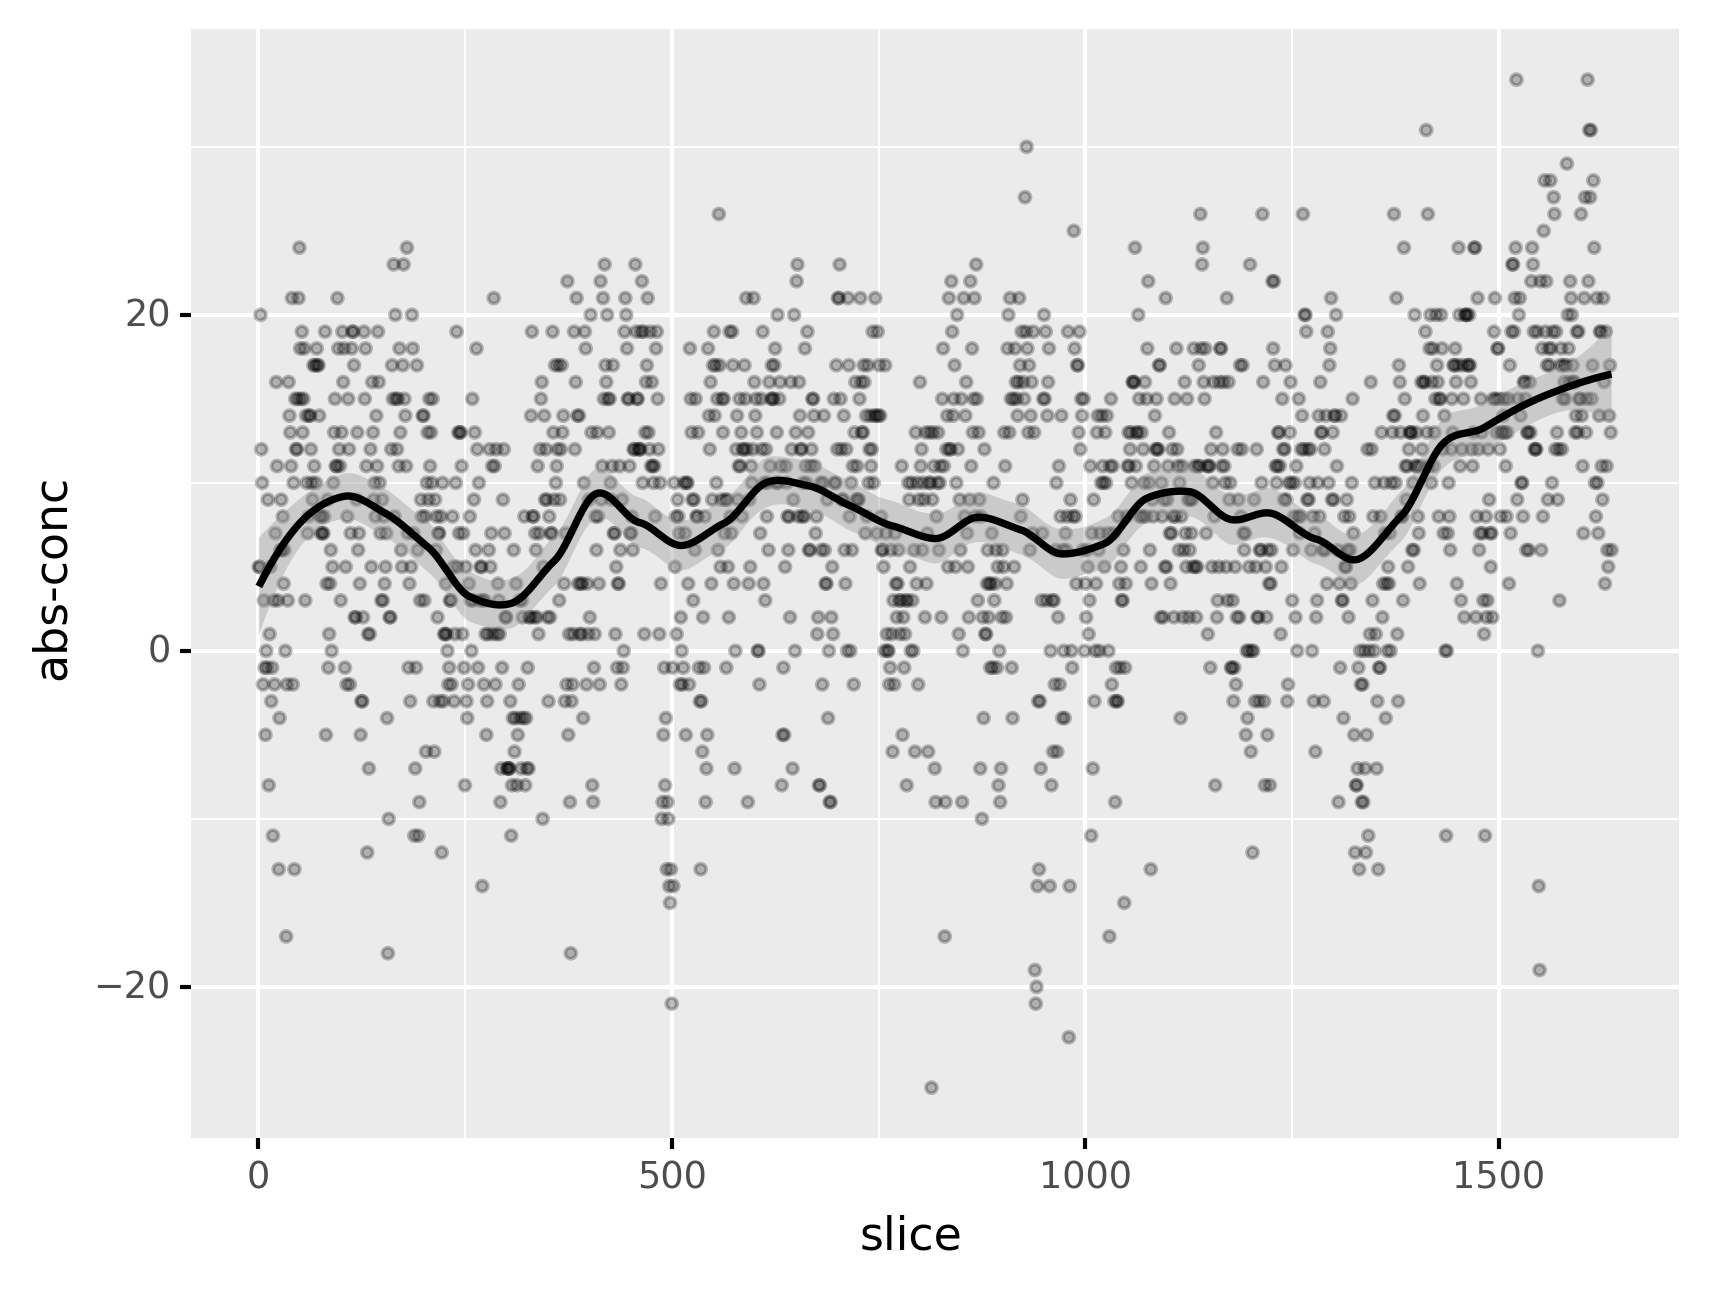

<ggplot: (8781487373641)>

In [85]:
plotstorytime(all_arcadia)

In [ ]:
plotstorytime(df[df.id=='Richardson.Pamela'])

In [ ]:
all_arcadia